# 타이타닉 생존자 예측하기
# 1. 데이터 읽고 전체적인 상황 확인하기

In [140]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
raw_data = pd.read_excel('../data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### 변수 설명
* pclass : 1, 2, 3등석 
* survived : 생존 여부. survived(생존), dead(사망)
* name : 이름
* sex : 
* 성별 : female(여성), male(남성)
* age : 나이
* sibsp : 함께 탑승한 형제 또는 배우자의 수
* parch : 함께 탑승한 부모 또는 자녀의 수
* ticket : 티켓 번호
* fare : 티켓 요금
* cabin : 선실 번호
* embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
* boat : 탈출한 보트가 있다면 boat 번호

In [4]:
raw_data.describe() # 통계치

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


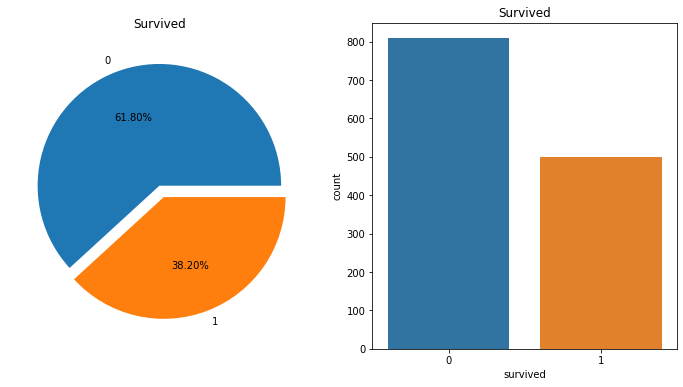

In [6]:
f, ax = plt.subplots(1, 2, figsize= (12,6)) # 1행 2열 

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct= '%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data = raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

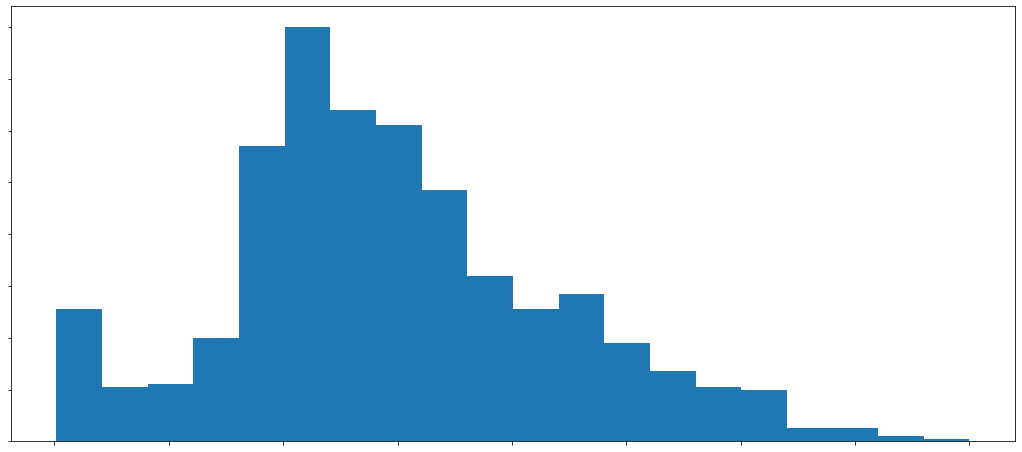

In [143]:
raw_data['age'].hist(bins=20, figsize=(18, 8), grid=False);

In [8]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [145]:
raw_data.corr() # 상관관계

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [148]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

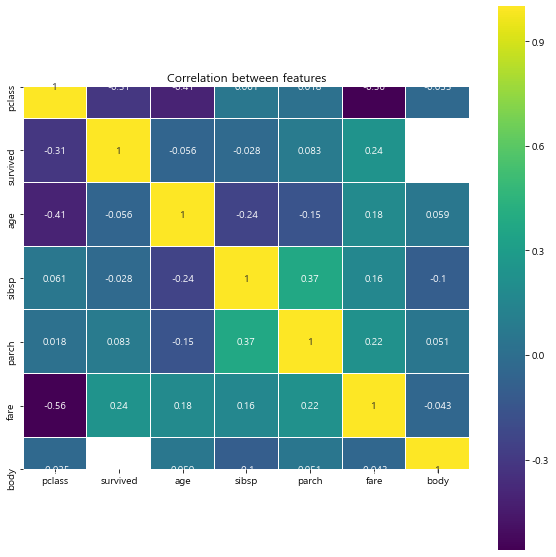

In [151]:
plt.figure(figsize = (10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square = True,
           annot = True, cmap=plt.cm.viridis, linecolor = 'white')
plt.title('Correlation between features')
plt.show()

# 나이별 구별 및 성별 생존률 확인하기

In [11]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                            bins = [0, 3, 7, 15, 30, 60, 100],
                            include_lowest = True,
                            labels = ['baby', 'children', 'teenage',
                                     'young', 'adult', 'old'])
raw_data.head(20)

# 0-3: baby
# 4-7: children
# 8-15: teenage
# 16-30: young
# 31-60; adult
# 60-100: old

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old


In [12]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


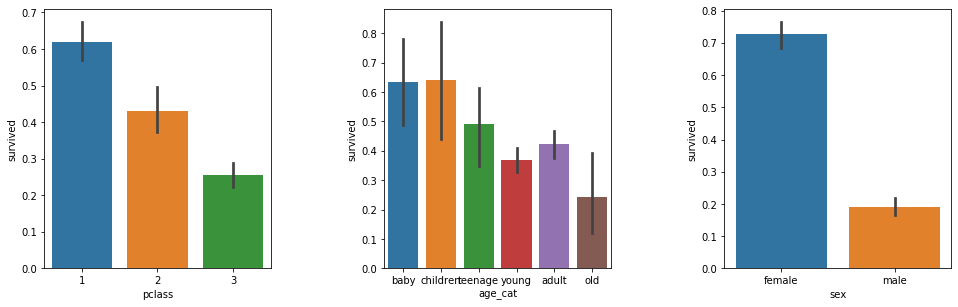

In [13]:
plt.figure(figsize=[14,4])

plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data) # 클래스별 생존율

plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data) # 나잇대별 생존율

plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data) # 성별 생존율

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1,
                   hspace=0.5, wspace=0.5)

plt.show()

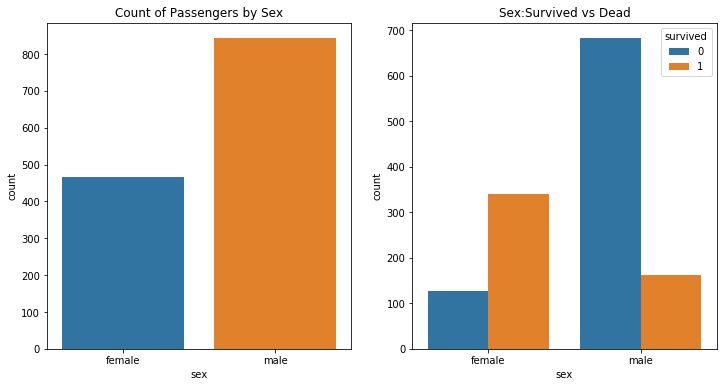

In [14]:
f, ax = plt.subplots(1,2,figsize = (12,6))
sns.countplot('sex', data = raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex') # 성별 승객 수

sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead') # 성별 생존자 수 
plt.show()

# 보트 탑승 승객의 생존률 확인하기

In [15]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


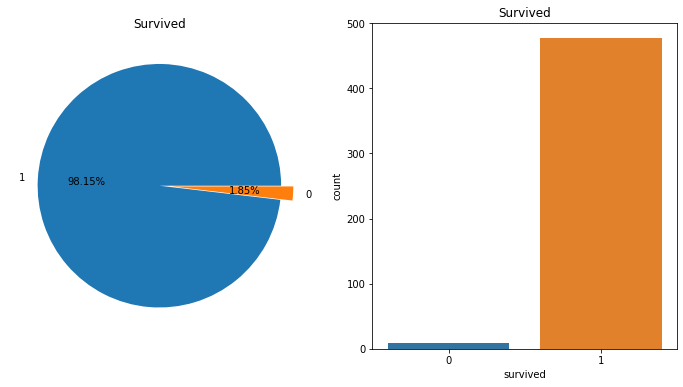

In [17]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                                  autopct = '%1.2f%%', ax = ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data = boat_survivors, ax= ax[1])
ax[1].set_title('Survived')
plt.show()

# 귀족들의 생존률만 다시 조사

In [18]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [19]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [20]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [21]:
raw_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

In [22]:
test = lambda x: x+2
test(2)

4

In [23]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [25]:
conversion_rare = \
lambda x: x.split(',')[1].split('.')[0].strip()

raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [26]:
# title을 index로 하고 sex 지정된 칼럼의 개수를 알려 줌
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [30]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 
        'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [33]:
print(raw_data[['title', 'survived']].groupby(['title'], 
                                             as_index=False).mean())
# as_index = False title이 인덱스가 되지 않게 설정

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


# 학습하기 위해 데이터를 정리하고, 특징을 선택하기

In [34]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [35]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan) # 성별을 0아니면 1로 변경 (컴퓨터는 숫자만 인식)

In [36]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [38]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()] # 형제 or 배우자
raw_data = raw_data[raw_data['parch'].notnull()] # 부모 자녀
raw_data = raw_data[raw_data['fare'].notnull()] # 티켓 요금
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
pclass       1045 non-null int64
survived     1045 non-null int64
name         1045 non-null object
sex          1045 non-null int64
age          1045 non-null float64
sibsp        1045 non-null int64
parch        1045 non-null int64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
title        1045 non-null object
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 131.8+ KB


# 생존자 예측을 위한 모델 수립

In [44]:
train_pre = \
    raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']] #중요하다고 생각한 데이터

train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,1,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, # 나눌 데이터
                                                   raw_data[['survived']], # 목표 데이터
                                                   test_size = 0.1,
                                                   random_state = 13)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
pclass    940 non-null int64
sex       940 non-null int64
age       940 non-null float64
sibsp     940 non-null int64
parch     940 non-null int64
fare      940 non-null float64
dtypes: float64(2), int64(4)
memory usage: 51.4 KB


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
pclass    105 non-null int64
sex       105 non-null int64
age       105 non-null float64
sibsp     105 non-null int64
parch     105 non-null int64
fare      105 non-null float64
dtypes: float64(2), int64(4)
memory usage: 5.7 KB


In [60]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
survived    940 non-null int64
dtypes: int64(1)
memory usage: 14.7 KB


In [61]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
survived    105 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


In [62]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3,0,37.0,0,0,7.7500
423,2,1,34.0,0,0,13.0000
646,3,0,38.0,1,5,31.3875
596,2,1,31.0,0,0,13.0000
286,1,0,63.0,1,0,221.7792


In [63]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [64]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('SCore: {}'.format(tree_clf.score(X_train, y_train)))

SCore: 0.8117021276595745


In [66]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = "titanic.dot",
    feature_names = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
    class_names = ['UNsurvived', 'Survived'],
    rounded = True,
    filled = True)

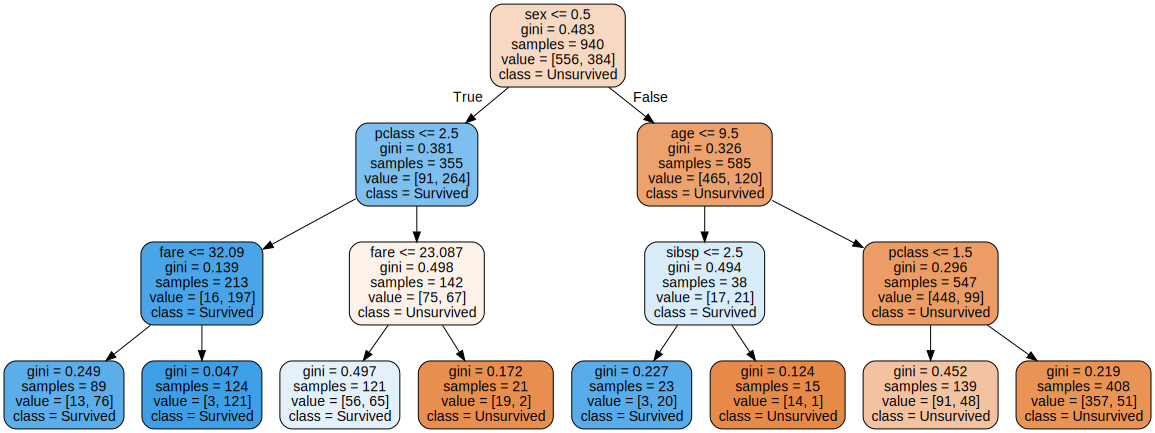

In [72]:
import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = 'titanic_tree', directory = 'decision_trees', cleanup = True)

dot

In [70]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [79]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
print("Test Accuarcy is ", accuracy_score(y_test, y_pred)*100)

Test Accuarcy is  84.76190476190476


# 디카프리오 생존 예측해보기

In [89]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]
joseph = [3, 1., 27., 0., 0., 5.]

In [77]:
tree_clf.predict_proba([winslet]) 

array([[0.02419355, 0.97580645]])

In [78]:
tree_clf.predict_proba([dicaprio]) # 디카프리오의 생존 확률

array([[0.875, 0.125]])

In [90]:
tree_clf.predict_proba([joseph]) # predict_proba - 확률

array([[0.875, 0.125]])

# RandomForestClassifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


훈련 세트 정확도: 0.982
테스트 세트 정확도: 0.810


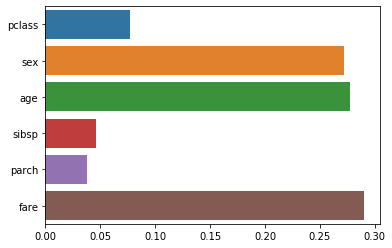

In [137]:
X_train, X_test, y_train, y_test = train_test_split(train_pre,
                                                   raw_data[['survived']],
                                                   test_size = .1,
                                                   random_state = 42)

forest = RandomForestClassifier(n_estimators=100, random_state=2) # n_estimators=100
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

sns.barplot(x=forest.feature_importances_, y = train_pre.columns); # 어떤 특성을 중요하게 생각하는지

# GradientBoostingClassfier

훈련 세트 정확도: 0.963
테스트 세트 정확도: 0.810


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


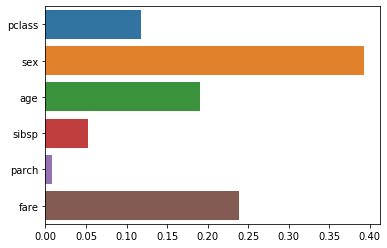

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(train_pre,
                                                   raw_data[['survived']],
                                                   test_size = .1,
                                                   random_state = 42)

gbrt = GradientBoostingClassifier(random_state = 5, learning_rate = 0.58,
                                 max_depth = 3)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

sns.barplot(x=gbrt.feature_importances_, y=train_pre.columns)